# Metro Interstate Traffic Volume Data Set
Introduction of the dataset:
* Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
* Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.

Goal with this project:
* The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

Attribute Information:
* holiday Categorical US National holidays plus regional holiday, Minnesota State Fair
* temp Numeric Average temp in kelvin
* rain_1h Numeric Amount in mm of rain that occurred in the hour
* snow_1h Numeric Amount in mm of snow that occurred in the hour
* clouds_all Numeric Percentage of cloud cover
* weather_main Categorical Short textual description of the current weather
* weather_description Categorical Longer textual description of the current weather
* date_time DateTime Hour of the data collected in local CST time
* traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume



In [6]:
import pandas as pd
I_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv', encoding = 'UTF-8')
I_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
I_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

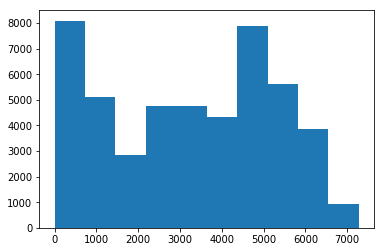

In [8]:
plt.hist(I_94['traffic_volume'])
plt.show()

In [9]:
I_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

* Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7,280 cars, with an average of 3,260 cars.

* About 25% of the time, there were only 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction. However, about 25% of the time, the traffic volume was four times as much (4,933 cars or more).

* This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

In [11]:
I_94['date_time'] = pd.to_datetime(I_94['date_time'])
i_94_copy = I_94.copy()

In [22]:
day = i_94_copy[(i_94_copy['date_time'].dt.hour >=7) & (i_94_copy['date_time'].dt.hour <19)]
print(day.shape)

(23877, 9)


In [21]:
night = i_94_copy[(i_94_copy['date_time'].dt.hour < 7) | (i_94_copy['date_time'].dt.hour >=19)]
print(night.shape)

(24327, 9)


* This significant difference in row numbers between day and night is due to a few hours of missing data. For instance, if you look at rows 176 and 177 (i_94.iloc[176:178]), you'll notice there's no data for two hours (4 and 5).

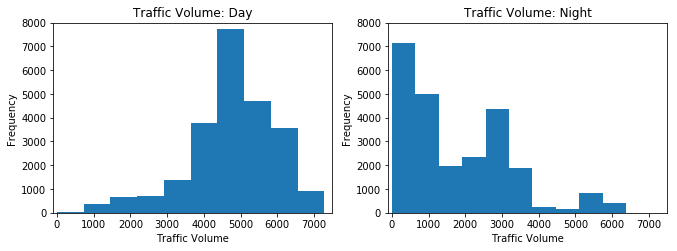

In [23]:
plt.figure(figsize=(11, 3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1,2,2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.show()

In [25]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [26]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

* The histogram that shows the distribution of traffic volume during the day is left skewed. This means that most of the traffic volume values are high — there are 4,252 or more cars passing the station each hour 75% of the time (because 25% of values are less than 4,252).

* The histogram displaying the nighttime data is right skewed. This means that most of the traffic volume values are low — 75% of the time, the number of cars that passed the station each hour was less than 2,819.

* Although there are still measurements of over 5,000 cars per hour, the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.


C:\Users\bayonetta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


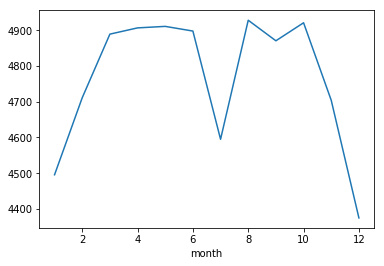

In [30]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.show()

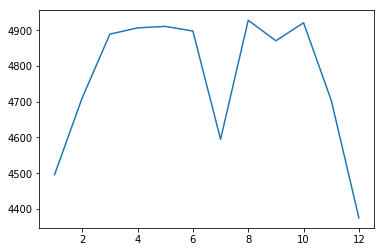

In [35]:
plt.plot(by_month['traffic_volume'])
plt.show()

* The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October), with one interesting exception: July. Is there anything special about July? Is traffic significantly less heavy in July each year?

* To answer the last question, let's see how the traffic volume changed each year in July.

C:\Users\bayonetta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


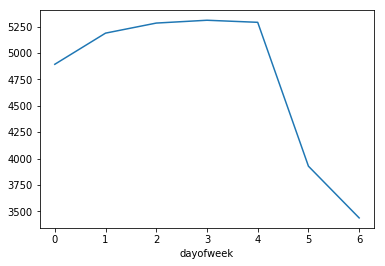

In [36]:
day['dayofweek']= day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot()

In [37]:
by_dayofweek['traffic_volume']

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

* we found that the traffic volume is significantly heavier on business days compared to the weekends.

In [39]:
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek']<=4]
weekend = day.copy()[day['dayofweek']>=5]
by_hour_business = business_day.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


C:\Users\bayonetta\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


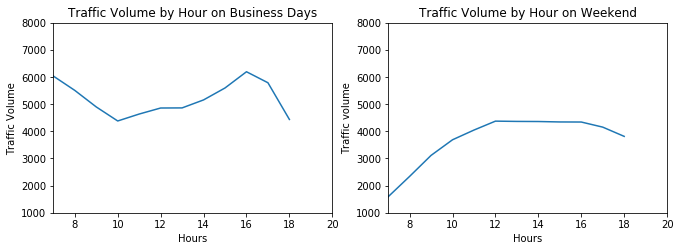

In [42]:
plt.figure(figsize=(11,3.5))
plt.subplot(1,2,1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume by Hour on Business Days')
plt.xlabel('Hours')
plt.ylabel('Traffic Volume')
plt.xlim(7,20)
plt.ylim(1000,8000)

plt.subplot(1,2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume by Hour on Weekend')
plt.xlabel('Hours')
plt.ylabel('Traffic volume')
plt.xlim(7,20)
plt.ylim(1000,8000)
plt.show()

* Generally the traffic volume on business days is heavier than the weekend/
* There are two peaks on business days which represent the rush hours for work/school cummuting.
* On the weekend, 12pm to 16pm shows a reletively high vulume, it might be resulted to the weekend events and activities.

To summarize, we found a few time-related indicators of heavy traffic:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

In [45]:
day['traffic_volume'].corr(day['temp'])

0.0036965098350734264

In [46]:
day['traffic_volume'].corr(day['rain_1h'])

0.0036965098350734264

In [48]:
day['traffic_volume'].corr(day['snow_1h'])

0.0012653498471759837

In [49]:
day['traffic_volume'].corr(day['clouds_all'])

-0.03293234866163951

In [57]:
day.corr()['traffic_volume'].drop('month').drop('dayofweek').drop('hour').drop('traffic_volume')

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

* Temperature shows the strongest correlation with a value of just +0.13. The other relevant columns (rain_1h, snow_1h, clouds_all) don't show any strong correlation with traffic_value.

In [63]:
by_weathermain = day.groupby('weather_main').mean()
by_weather_desc = day.groupby('weather_description').mean()

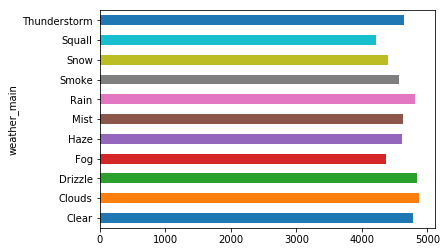

In [60]:
by_weathermain['traffic_volume'].plot.barh()
plt.show()

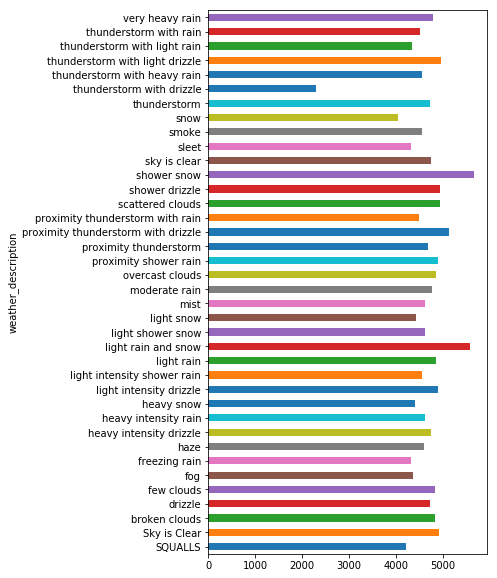

In [67]:
by_weather_desc['traffic_volume'].plot.barh(figsize = (5,10))
plt.show()

* It looks like there's no weather type where traffic volume exceeds 5,000 cars. This makes finding a heavy traffic indicator more difficult. Let's also group by weather_description, which has a more granular weather classification.

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle
It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

Time indicators
* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to the weekends.
* On business days, the rush hours are around 7 and 16.

Weather indicators
* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle